In [1]:
import numpy as np
import pandas as pd

from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Ecommerce Customers.csv")
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
df.isna().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [6]:
z_score = np.abs(stats.zscore(df["Avg. Session Length"]))

In [7]:
ar = np.where(z_score > 3)
ar

(array([ 12, 154], dtype=int64),)

In [8]:
out = [df["Avg. Session Length"][i] for i in np.nditer(ar)]
out

[29.532428967057943, 36.13966248879052]

<AxesSubplot: >

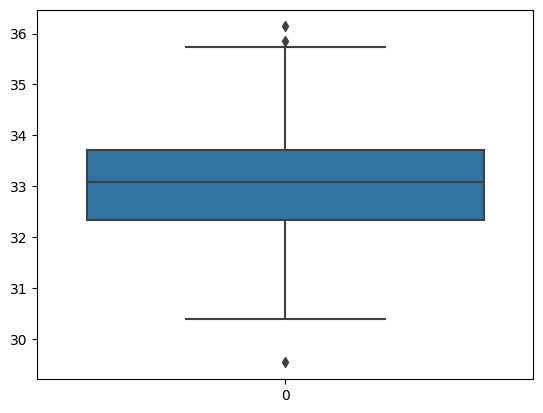

In [9]:
sns.boxplot(df["Avg. Session Length"])

In [10]:
out_free = df.loc[df["Avg. Session Length"] < 29.532428967057943]
free = df.loc[df["Avg. Session Length"] < 36.13966248879052]

In [11]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [12]:
free.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,499.000000,499.000000,499.000000,499.000000,499.000000
mean,33.047008,12.052492,37.060647,3.532797,499.120672
std,0.983866,0.995213,1.011493,1.000170,79.276314
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.340848,11.387694,36.346012,2.929280,445.014369
50%,33.078717,11.982045,37.071643,3.532862,498.635598
75%,33.709403,12.755623,37.716878,4.127420,549.069900
max,35.860237,15.126994,40.005182,6.922689,765.518462


<AxesSubplot: >

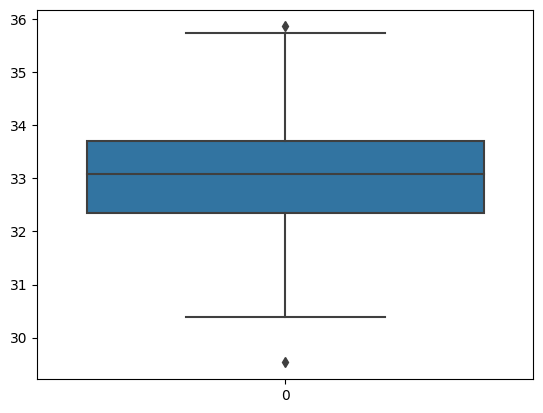

In [13]:
sns.boxplot(free["Avg. Session Length"])

### imputation method

In [14]:
df.loc[df["Avg. Session Length"] > 29.532428967057943, "Avg. Session Length"] = df.loc[df["Avg. Session Length"] < 29.532428967057943, "Avg. Session Length"].median()        
# df.loc[df["Avg. Session Length"] > 36.13966248879052, "Avg. Session Length"] = df.loc[df["Avg. Session Length"] < 36.13966248879052, "Avg. Session Length"].median()                   

<AxesSubplot: >

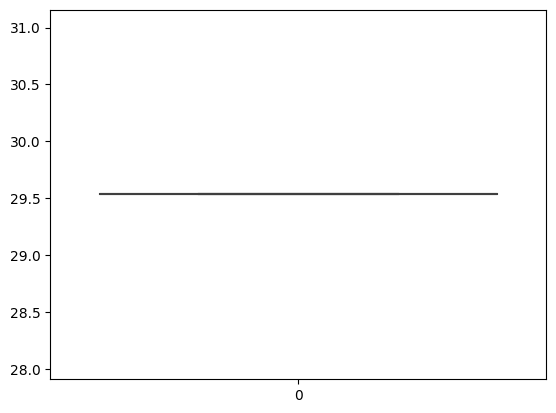

In [15]:
sns.boxplot(df["Avg. Session Length"])